![alt text](https://www.unsw.edu.au/sites/default/files/UNSW_0.png)

# Video Ad Analytics - UNICEF Project






Overview of this tutorial:
---
**1.   Discussions on Quiz 1 (30 minutes):**

> *   Mark attendence;

> *  Discussions on [Quiz 1 answers](https://drive.google.com/open?id=1UkN37TLs9-r0M-zaOQM28_ztdIbxDLfI);

>* Other announcements and discussions.


**2.   Background Inofrmation and Video Data Pre-Processing (30 minutes):**

> * Background Information On [UNICEF](https://www.unicef.org.au/);
> * 3987 Videos from [UNICEF YouTube Page](https://www.youtube.com/user/unicef);
>* Discussions on the [Microsoft Video Indexer API](https://drive.google.com/open?id=1g_Ln2SSDcuDQtmqoWAIzYKK5S8SN3cAw);
>* Discussions on the "[raw_data.csv](https://drive.google.com/open?id=1ZOjreBrtl7lWZh5nmJFhEP5vJQ0y1ei7)";
>* Discussions on the "[Raw data analytics](https://drive.google.com/open?id=11EPqkKuxwsRYRy6iMMp4EB9aT0Ojk-p7NPLzwR9tKfw)".


>** Research Question: What influence the <font color='red'> *number of Likes* </font> to an UNICEF video? **

** 3.   Video Data Visualizations (20 minutes): **

**Aim** of Data Visualizations:


1.   Communicate findings in contructive ways;
2.   Faster actions;
3.  Understand connections between different variables;
4. Embrace emerging trends;
5. Interact with Data;
6. Create new discussions.

Data Visualization **techniques**:

>* Bar charts;
>* Scatter plots;
>* Box plots;
>* Histograms.

** 4.   Video Data Analytics (20 minutes): **
>* Discussions on the [Microsoft Video Indexer](https://www.videoindexer.ai/accounts/ad81d28c-3565-42d1-9408-5ad3262486a2/videos/f7c620e73f/);
>* Discussions on the "[processed_data.csv](https://drive.google.com/open?id=1bm0ClK5CKM5aLZuuslNIdqSAGb4hpUuX)";
>* Discussions on the Linear Regression model, including discussions on coefficients, p-values and result interpretations;
>* Discussions on the Variance Inflation Factor (VIF);
>* Discussions on the results and recommendations.

**Hypothetical Scenario: As an advertising consultant, you are tasked by the company UNICEF to analyse their Youtube Channel content. You have to analyse their videos and ultimately give them advice on how to improve their video content quality so that they achieve more likes. (assuming more likes -> more awareness/donations for charity)**

We will be covering through data visualisation techniques. To create graphs and visuals, we will be using the [Seaborn](https://seaborn.pydata.org/) library. Seaborn is a popular visualisation library in Python that offers a great balance between ease-of-use and versatile functionalities.

Google Colaboratory has Seaborn version 0.7.1, but we want to use Seaborn version 0.9.0 which provides more graphs. For this reason, we will need to upgrade its current version. This is done in the cell below.

In [0]:
!pip install --upgrade seaborn

    100% |████████████████████████████████| 215kB 27.7MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


Similar to last week, we will need to upload some files before we can continue with the notebook.

Here we will need to upload the following (all available on Moodle):
- **week2_helpers.py**: This contains the implementation of the function **variance_inflation_factor**, which we will be using for this lab.
- **unicef_youtube_clean.csv**: Data associated with UNICEF videos from Youtube.
- **unicef_indexer_clean.csv**: Data associated with UNICEF videos from Microsoft Video Indexer.

In [0]:
# Upload "week2_helpers.py", "unicef_youtube_clean.csv" and "unicef_indexer_clean.csv" files from Moodle

from google.colab import files
files.upload()

Here, we import the libraries we will use for this notebook.

Library | Purpose
--|--
week2_helpers | Implementation of variance_inflation_factor (covered later)
pandas | Dataframe (excel-like) manipulation
seaborn | Data visualisation library
statsmodels | Linear regression (with coefficient & p-value analysis included)
warnings | [Optional] To remove warning messages

In [0]:
# Ignore warnings

import warnings
warnings.filterwarnings('ignore')

# Import the function "variance_inflation_factor" from the week2_helpers.py file

from week2_helpers import variance_inflation_factor
import pandas as pd

# Seaborn set aesthetic parameters in one step.

import seaborn as sns; sns.set()
import statsmodels.api as sm

In [0]:
# Read the two CSV files into Pandas DataFrames.

df_indexer = pd.read_csv("unicef_indexer_clean.csv")
df_youtube = pd.read_csv("unicef_youtube_clean.csv")

df.merge() is a special method for joining two dataframes with a COMMON index.

Here, we will be joining the data from **df_youtube** with the data from **df_indexer**. The *left_on* and *right_on* parameters specify which columns are the same. In this case, df_youtube["video_id"] is identical to df_indexer["id"].

In [0]:
# Merge the two CSV files together based on "video IDs" columns

df_merge = df_youtube.merge(df_indexer, left_on = "video_id", right_on = "id")

We have a **LOT** of variables this time. Notice that df_merge.info() won't print out details about each column. However, this can easily be fixed by specifying the *max_cols* parameter.

In [0]:
# Print information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3987 entries, 0 to 3986
Columns: 475 entries, genre to indexer_statistics_correspondence_count
dtypes: bool(1), float64(3), int64(466), object(5)
memory usage: 14.5+ MB


In [0]:
df_merge.info(max_cols=500)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3987 entries, 0 to 3986
Data columns (total 475 columns):
genre                                                                              3987 non-null object
height                                                                             3987 non-null int64
is_family_friendly                                                                 3987 non-null bool
likes                                                                              3868 non-null float64
url                                                                                3987 non-null object
video_id                                                                           3987 non-null object
width                                                                              3987 non-null int64
tags_length                                                                        3987 non-null int64
title_entities_unicef                                           

Before we head to data visualisation, we will perform some basic cleaning steps.

In the cell below, we are removing columns that will not be useful in the Linear Regression model.

In [0]:
remove_cols = [
    "id",
    "video_id",
    "url",
]
df_merge = df_merge.drop(columns=remove_cols, axis=1)

If you have noticed from running .info(), the column "likes" contains a bit of missing data. (3868/3987 not missing). This is because on Youtube, some videos have been set so that "likes" and "dislikes" have been disabled. 

In this scenario, it would be best to drop those rows:

In [0]:
# Remove rows containing "NA" values in the "likes" columns

df_merge = df_merge.dropna(subset=["likes"])

# Video Data Visualisation Techniques - Plotting

Before going into Linear Regression, it is crucial in any step of Data Analysis to understand your data. This is called **Exploratory data analysis**. 

By doing this, we can:
- Predict which columns may or may not be important in the Regression analysis. (ie, Creating your own hypothesis)
- Visualise patterns/trends between two or more variables.
- Deduce whether our data is correct, or needs more cleaning.

## Plot Bar Charts

A bar chart (or bar plot) visualises the relationship between a **numeric** variable and a **categorical** variable.

Some uses cases involve:
- Counting the frequency (occurrence) of each category in a categorical variable.
- Determining the average/max/min/range of a variable in relation each category in a categorical variable.

In seaborn, we can use [sns.barplot()](https://seaborn.pydata.org/generated/seaborn.barplot.html)

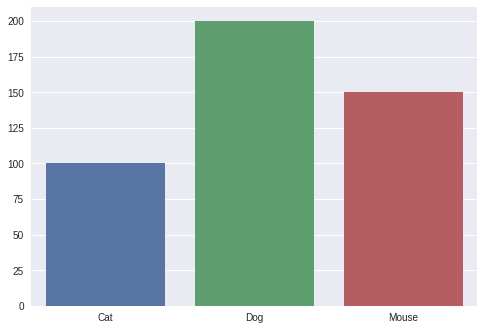

In [0]:
# Plot a simple bar chart

bar_plot = sns.barplot(x=["Cat", "Dog", "Mouse"], y=[100, 200, 150])

2007    686
2010    497
2012    439
2009    437
2008    390
2011    389
2013    323
2014    249
2017    128
2015    126
2016    114
2018     54
2006     36
Name: date_published_year, dtype: int64


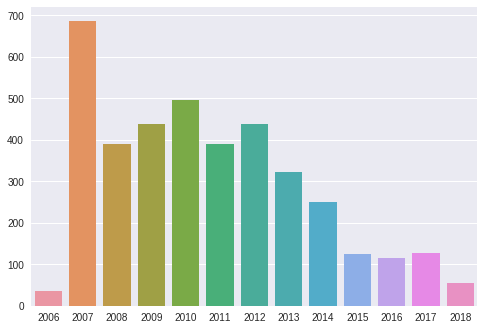

In [0]:
years = df_merge["date_published_year"].value_counts() # Count the number of UNICEF videos published in that year
print(years)
year_plot = sns.barplot(x=years.index, y=years.values) # Plot the number of UNICEF videos published according to the Published_Year

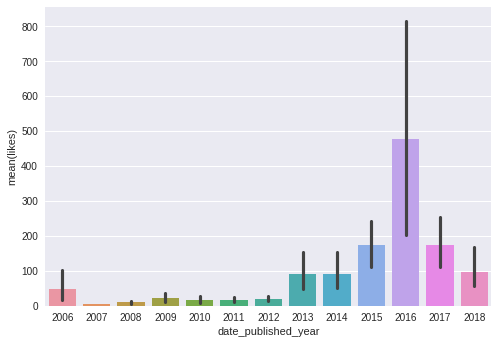

In [0]:
year_plot_avg_likes = sns.barplot(x="date_published_year", y="likes", data=df_merge) # Average likes by date_published_year (black line represent the confidence interval if you're curious)

## Scatter Plots

A scatter plot is another common plot that displays the relationship between two (or more) numeric variables.

Some use cases involve:
- Plotting x1 vs x2 (if there is a clear relationship, then there may be **multicollinearity** issues)
- Plotting x1 vs y (a positive correlation would in *most cases* result in a positive coefficient in the regression analysis)

In seaborn, this is possible in multiple ways. However, these examples will use [sns.regplot()](https://seaborn.pydata.org/generated/seaborn.regplot.html) which will include a regression line (line of best fit) and a confidence interval to help us visualise the trends.

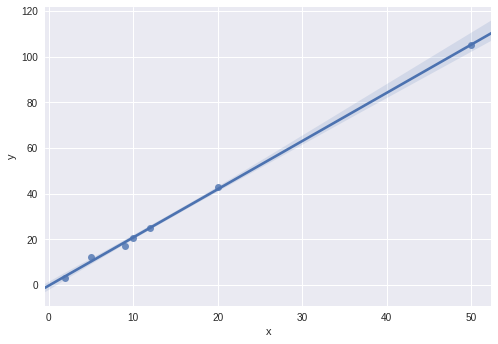

In [0]:
# Simple scatter plot example

data = pd.DataFrame({
    "x": [2,5,9,10,12,20,50],
    "y": [3,12,17,20.5,25,43,105]
})
lineplot = sns.regplot(x="x", y="y", data=data)

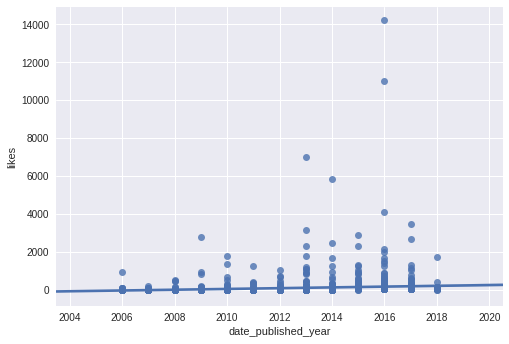

In [0]:
# Scatter plot of "number of views" v.s "number of likes" on the UNICEF video data

like_interaction = sns.regplot(x="date_published_year", y="likes", data=df_merge)

## Box Plots

![alt text](https://chartio.com/images/tutorials/box-plot/boxplot1.png)

A boxplot can be used for a single numeric variable to indicate its distribution of values. 

You do NOT need to know what every labels mean in the diagram above. The general gist is that:

- Outliers lie outside the "hands" of the "box"
- The majority of values lie inside the "box"

Boxplots are great to identify outliers in your dataset.

In seaborn, we can use [sns.boxplot()](https://seaborn.pydata.org/generated/seaborn.boxplot.html) to make a box plot.


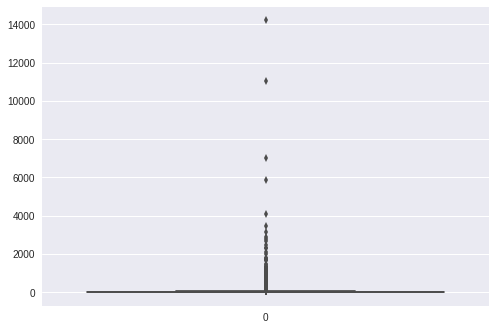

In [0]:
# Box plot of "number of likes" on the UNICEF video data

boxplot = sns.boxplot(data=df_merge["likes"])

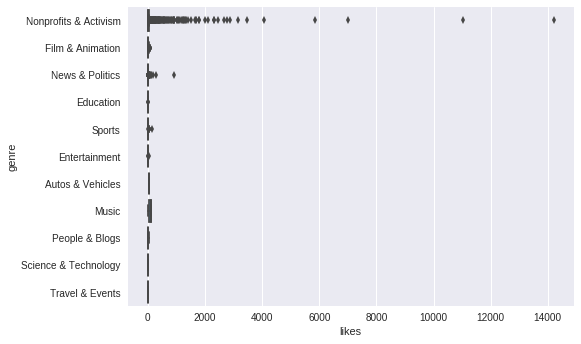

In [0]:
# Multiple box plots of the "number of likes" v.s "genre" on the UNICEF video data

boxplot_genre_likes = sns.boxplot(x="likes", y="genre", data=df_merge)

## Histograms!

[Bar graph v.s Histogram](![alt text](https://vignette.wikia.nocookie.net/math/images/7/76/Bar-chart-vs-histogram.gif/revision/latest?cb=20140706154605&path-prefix=en)


![alt text](https://vignette.wikia.nocookie.net/math/images/7/76/Bar-chart-vs-histogram.gif/revision/latest?cb=20140706154605&path-prefix=en)



Histograms can also be used for a single numeric variable to measure its distribution of values (similar to boxplot).

The histogram cuts the data into 'n' evenly-sized chunks (called bins) and plots the frequency of the variable within each 'chunk.' Histograms tend to work better with larger amounts of data than boxplots.

In Seaborn, we can make histogram plots using the keyword [sns.distplot()](https://seaborn.pydata.org/generated/seaborn.distplot.html)

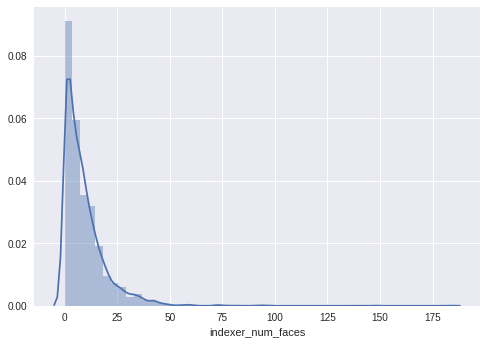

In [0]:
# Histogram of "number of faces" on the UNICEF video data

num_faces_hist = sns.distplot(df_merge["indexer_num_faces"])

# Training - Linear Regression Model and Variance Inflation Factor (VIF)

Now onto Regression! Everything will be similar to week 1, but we will be performing a thing called **Variance Inflation Factor** analysis this week. But first let's perform a standard regression analysis.

Before we run regression, we need to convert our categorical values into numeric columns. The main reasons are:
- Convert string to numeric data. The model will NOT be able to interpret columns with text data, and will most likely spit out an error.
- Easier interpretation. Consider the following variable: animals = {dog, cat, bird}. If we perform regression with the column *animals* and get results:

column | coefficient
--|--
animal | 1

versus if we split the columns into is_dog, is_cat, and is_bird and perform regression:

column | coefficient
--|--
is_dog | 1
is_cat | 2
is_bird | -2.

The second scenario provides us more information than the first case!

To split a categorical variable into separate columns, we use pd.get_dummies() (see Python Lesson 2).

Here is a basic example:

In [0]:
# Simple example to show "get_dummies()""

animals = pd.DataFrame({"animal": ["dog", "cat", "bird", "dog"]})

In [0]:
# Print animals Dataframe

animals

,animal
0,dog
1,cat
2,bird
3,dog


In [0]:
# get_dummies() on animals

animals_get_dummies = pd.concat([animals, pd.get_dummies(animals)], axis=1)

In [0]:
# Print animals_get_dummies

animals_get_dummies

,animal,animal_bird,animal_cat,animal_dog
0,dog,0,0,1
1,cat,0,1,0
2,bird,1,0,0
3,dog,0,0,1


So now that we know what pd.get_dummies() does, let's apply it to all categorical columns!

In [0]:
# Dummify Categorical Object columns from the UNICEF Video dataset

df_merge = pd.get_dummies(df_merge, columns=['genre', 'indexer_source_language', 'date_published_year', 'date_published_month', 'date_published_day'], drop_first=True)

In [0]:
# Print the dataset

df_merge.head()

,height,is_family_friendly,likes,width,tags_length,title_entities_unicef,title_entities_haiti,title_entities_pakistan,title_entities_congo,title_entities_syrian,...,date_published_day_22,date_published_day_23,date_published_day_24,date_published_day_25,date_published_day_26,date_published_day_27,date_published_day_28,date_published_day_29,date_published_day_30,date_published_day_31
0,720,True,2.0,1280,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,720,True,898.0,1280,8,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,720,True,2.0,1280,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,360,True,17.0,480,10,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,360,True,19.0,480,8,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Here, our *y* (or target variable) is *likes*. Recall that our goal is to help find variables for UNICEF so that the number of likes on the video would be maximised.

In [0]:
# Number of likes is the Y variable in our Linear Regression model

y = df_merge.pop("likes")

In [0]:
# Results from the Linear Regression model

X = sm.add_constant(df_merge.astype(float))
model = sm.OLS(y, X).fit()
# est2 = est.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     1.665
Date:                Thu, 28 Feb 2019   Prob (F-statistic):           1.30e-16
Time:                        15:53:54   Log-Likelihood:                -27980.
No. Observations:                3868   AIC:                         5.702e+04
Df Residuals:                    3340   BIC:                         6.032e+04
Df Model:                         527                                         
Covariance Type:            nonrobust                                         
                                                                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

**Variance Inflation Factor (vif)** is a special statistical technique that helps remove columns that suffer from high **multicollinearity**.

When we perform linear regression: we are essentially doing:

>$y=const + m_1x_1 + m_2x_2 + ... m_nx_n$, where
- $m_n $ represents the coefficient
- $x_n $ represents the column value
- $ n $ represent the number of columns

With this equation, we are assuming that:
- Every x variable is **independent** from other x variables.

If $ x_1 $ is **not independent** (for example: $ x_1=x_2+x_3 $), then it would 
- Have a high multicollinearity.
- Have a high **vif** value. (for this exercise, we want columns with a **vif** <= 5)
- We would want to **remove** this column (since the data can be represented from $ x_2 $ and $ x_3 $ alone, $ x_1 $ would become redundant in our dataset)

Problems with keeping columns with a high **vif** value:
- Model would typically have a larger proportion of variables with a **high** p value.
- The coefficients may have the wrong sign (+ / -), or may be inaccurate.

The cell below would calculate the **vif** values for every x column, and we want to remove columns with a high vif value ( > 5). (The code may run for 10-20 seconds)




In [0]:
# VIF on X variables

vif = variance_inflation_factor(X)

In [0]:
# Print VIF results

df_coeffs = pd.DataFrame({"Coefficients": model.params, "p": model.pvalues, "vif": vif["vif"]})
df_coeffs = df_coeffs.drop("const", axis=0)
df_coeffs_sorted = df_coeffs.reindex(df_coeffs["p"].sort_values().index)
df_coeffs_sorted.style.bar(subset = ["Coefficients", "p", "vif"], align='mid', color=['#d65f5f', '#5fba7d'])

In [0]:
# Remove columns with vif > 5

df_vif = X.loc[:, vif["vif"] <= 5]

In [0]:
# Rerun regression (after performing a vif check)
X_vif = sm.add_constant(df_vif.astype(float))
model_vif = sm.OLS(y, X_vif).fit()
print(model_vif.summary())

                            OLS Regression Results                            
Dep. Variable:                  likes   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.139
Date:                Thu, 28 Feb 2019   Prob (F-statistic):             0.0288
Time:                        15:54:12   Log-Likelihood:                -28154.
No. Observations:                3868   AIC:                         5.723e+04
Df Residuals:                    3407   BIC:                         6.012e+04
Df Model:                         460                                         
Covariance Type:            nonrobust                                         
                                                                                      coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

In [0]:
vif = variance_inflation_factor(df_vif.astype(float))

In [0]:
# New results after VIF

df_coeffs = pd.DataFrame({"Coefficients": model_vif.params, "p": model_vif.pvalues, "vif": vif["vif"]})
df_coeffs_sorted = df_coeffs.reindex(df_coeffs["p"].sort_values().index)
df_coeffs_sorted.style.bar(subset = ["Coefficients", "p", "vif"], align='mid', color=['#d65f5f', '#5fba7d'])

In Conclusion, what can we recommend to UNICEF?

- Include "UNICEF" in the title of their video?
- Publish videos on December?
- More video content about Health/Social Work?